In [21]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8')
plt.rcParams["patch.force_edgecolor"] = True



In [22]:
file = up.open('unoscillated_IBD_userfile.root')
dataset = file['TRec'].arrays(library = 'pd')
print(len(dataset))
dataset.describe()

198502


,recx,recy,recz,recQx,recQy,recQz,recTx,recTy,recTz,recQTx,...,m_memory,Truex,Truey,Truez,TrueQx,TrueQy,TrueQz,TrueR,TrueQR,edep
count,198502.000000,198502.000000,198502.000000,198502.000000,198502.000000,198502.000000,198502.000000,198502.000000,198502.000000,198502.000000,...,198502.000000,198502.000000,198502.000000,198502.000000,198502.000000,198502.000000,198502.000000,198502.000000,198502.000000,198502.000000
mean,-28.072916,14.531397,20.230711,-22.042791,14.528477,-2.518828,-27.900082,14.554224,19.711164,-28.072916,...,2287.413086,421.806610,-894.237671,-497.609985,420.916168,-885.755371,-508.334106,13160.738281,13168.784180,5.690210
std,7901.063965,7884.257324,7891.284180,7957.487305,7942.205078,7790.238281,7896.901855,7879.674316,7886.362305,7901.063965,...,283.007812,7667.807129,7743.304688,8152.816406,7658.115234,7753.792480,8159.926758,3638.921875,3626.956055,1.489488
min,-17398.648438,-17393.871094,-17392.330078,-17399.041016,-17392.943359,-17398.025391,-17398.648438,-17393.871094,-17392.335938,-17398.648438,...,733.000000,-17616.595703,-17529.890625,-17614.812500,-17617.835938,-17610.113281,-17607.193359,256.428040,285.403198,0.470106
25%,-6166.640869,-6125.649780,-6099.566162,-6248.652954,-6219.240479,-5968.010620,-6163.028564,-6124.049683,-6096.575073,-6166.640869,...,2340.000000,-5383.926514,-7445.807129,-6413.716797,-5356.382812,-7504.481445,-6402.650024,10933.025391,10829.661133,4.685162
50%,-64.386719,0.004058,-0.037627,-47.502789,37.880650,-20.866035,-64.268566,0.004041,-0.150778,-64.386719,...,2356.000000,497.443756,-1348.320435,-470.532181,519.999756,-1355.580933,-478.537506,13865.617676,13868.464844,5.468358
75%,6076.635498,6131.004761,6161.920288,6173.918091,6222.125610,5990.215698,6074.452759,6125.194702,6156.928589,6076.635498,...,2359.000000,6449.464844,4878.461304,5921.611450,6452.935547,4877.186523,5920.121826,16300.104492,16196.626953,6.559789
max,17392.644531,17378.861328,17399.994141,17392.894531,17385.048828,17399.164062,17393.892578,17378.855469,17399.636719,17392.644531,...,2381.000000,17597.105469,17609.951172,17699.705078,17631.246094,17610.367188,17624.376953,17700.121094,17697.771484,15.032843


In [23]:
dataset['m_QEn'] = dataset['m_QEn'] * 0.92

# **Time Analysis**

Plot trigger time of consecutive events only to see they are in temporal order

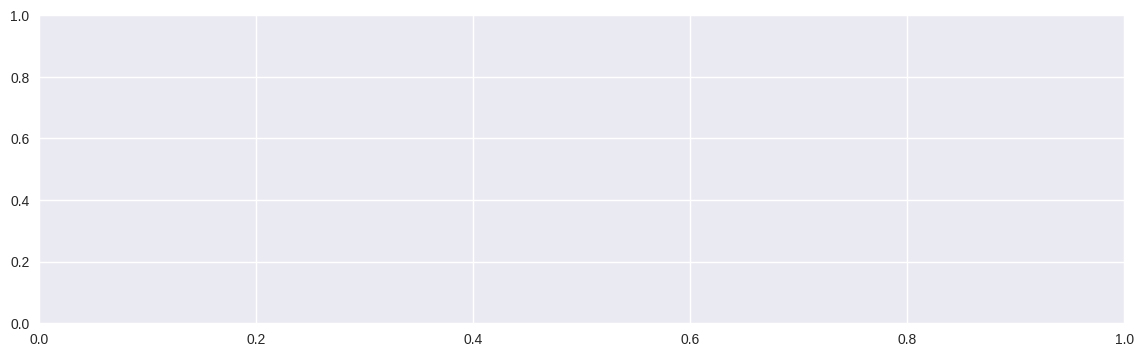

In [50]:
fig_prova, ax_prova = plt.subplots(figsize= (14,4))



(0.0, 250000000000.0)

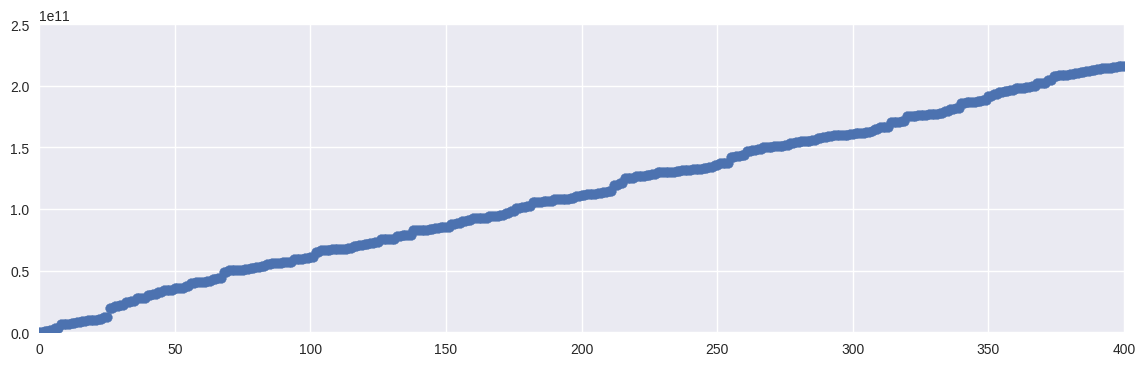

In [25]:
fig_prova, ax_prova = plt.subplots(figsize= (14,4))
ax_prova.scatter([i for i in range(len(dataset))], dataset['m_triggerT'])
plt.xlim(0,  400)
plt.ylim(0,  0.25e12)

Text(0.5, 1.0, 'Plt of delta time of consecutive events')

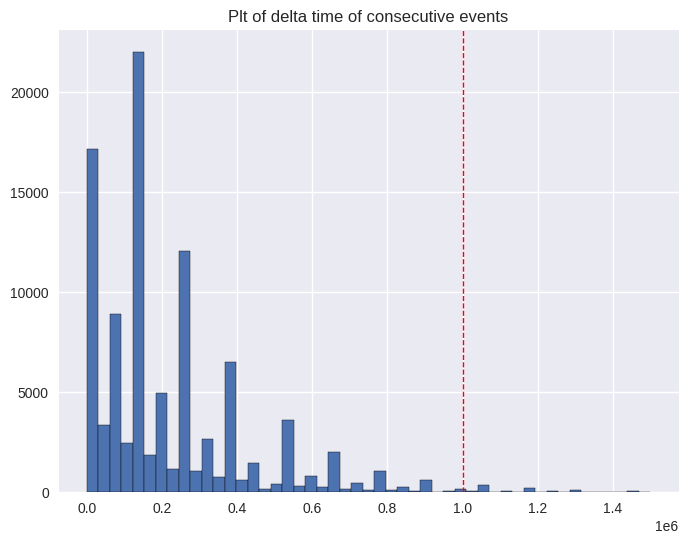

In [52]:
diff_time = [( dataset["m_triggerT"][i+1] - dataset["m_triggerT"][i] ) for i in range(len(dataset)-1)]

fig_r_d, ax_r_t = plt.subplots(figsize = (8,6))
ax_r_t.hist(diff_time, np.linspace(0, 1.5e6, 50))
plt.axvline(1e6, color='red', linestyle='dashed', linewidth=1)

ax_r_t.set_title("Plt of delta time of consecutive events")



I assume that even calculating the time difference between consecutive events and plotting it I will not obtain the exponential distribution we expect from IBD because I did not tagged prompt and delayed events

# **Distance Analysis**

Text(0.5, 1.0, 'Plt of delta radius of consecutive events')

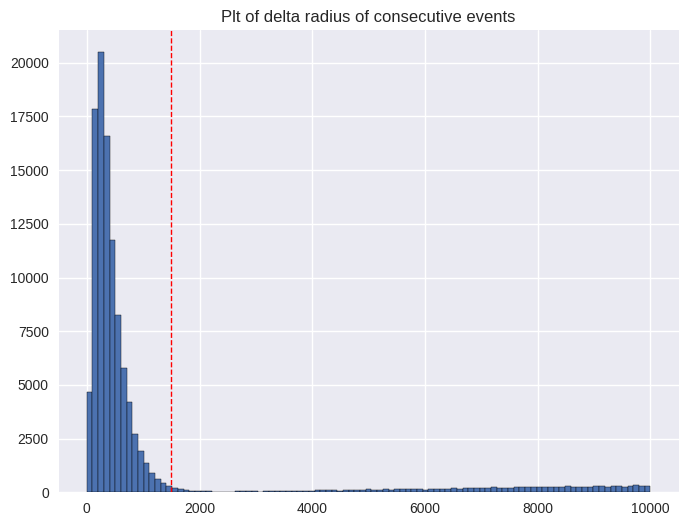

In [49]:
xs_reco = file['TRec']['recx'].array(library = 'np')
ys_reco = file['TRec']['recy'].array(library = 'np')
zs_reco = file['TRec']['recz'].array(library = 'np')
es_reco = file['TRec']['m_QEn'].array(library = 'np')

def dist(x1,x2,y1,y2,z1,z2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

fig_r_d, ax_r_d = plt.subplots(figsize = (8,6))

diff = [(dist(dataset['recx'][i+1],dataset['recx'][i],dataset['recy'][i+1],dataset['recy'][i],dataset['recz'][i+1],dataset['recz'][i]) ) for i in range(len(dataset)-1)]

ax_r_d.hist(diff, np.linspace(0,10000, 100))
plt.axvline(1500, color='red', linestyle='dashed', linewidth=1)

ax_r_d.set_title("Plt of delta radius of consecutive events")

# **Divide prompt and delay signal**

Using the analysis did before we could decide the cuts that we neet to make. I perform the analysis using the cuts that in the paper have been made 

## *Energy Ranges*

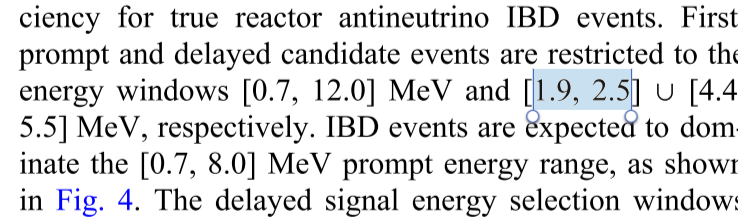

In [28]:
delta_time = 1e6  # ~200us 
delta_radius = 1500 #1.5 m
min_energy_prompt = 0.7 #MeV
max_energy_prompt = 12

min_energy_delay = 1.9 #MeV
max_energy_delay = 2.5

#Here I made some changes
min_energy_delay_carb = 4.4 #MeV
max_energy_delay_carb = 5.5



In [29]:
prompt_columns = []
delay_columns = []
delay_columns_carb = []


#IBD_dataset = dataset[(dataset["m_QEn"]>= min_energy_prompt) & (dataset["m_QEn"]<= max_energy_prompt)]
for i in range(len(dataset)-1):
    if dataset["m_triggerT"][i+1] - dataset["m_triggerT"][i] < delta_time: #time cut
        if dist(dataset['recx'][i+1],dataset['recx'][i],dataset['recy'][i+1],dataset['recy'][i],dataset['recz'][i+1],dataset['recz'][i]) < delta_radius: #radius cut
            if dataset["m_QEn"][i]>= min_energy_prompt and dataset["m_QEn"][i]<= max_energy_prompt:
                if dataset["m_QEn"][i+1]>= min_energy_delay and dataset["m_QEn"][i+1]<= max_energy_delay:
                    prompt_columns.append(i)
                    delay_columns.append(i+1)
                if dataset["m_QEn"][i+1]>= min_energy_delay_carb and dataset["m_QEn"][i+1]<= max_energy_delay_carb:
                    delay_columns_carb.append(i+1)

prompt_events = dataset.iloc[prompt_columns]
delay_events = dataset.iloc[delay_columns]
delay_events_carb = dataset.iloc[delay_columns_carb]

s = pd.Series([i for i in range(len(prompt_events))])
prompt_events.set_index(s)

s = pd.Series([i for i in range(len(delay_events))])
delay_events.set_index(s)

s = pd.Series([i for i in range(len(delay_events_carb))])
delay_events_carb.set_index(s)




print("Number Prompt Events: ",len(prompt_events))
print("Number Delay Events: ",len(delay_events))
print("Number Delay Carbon Events: ",len(delay_events_carb))

Number Prompt Events:  95122
Number Delay Events:  95122
Number Delay Carbon Events:  1112


Text(0.5, 1.0, 'Delayed Events Carbon')

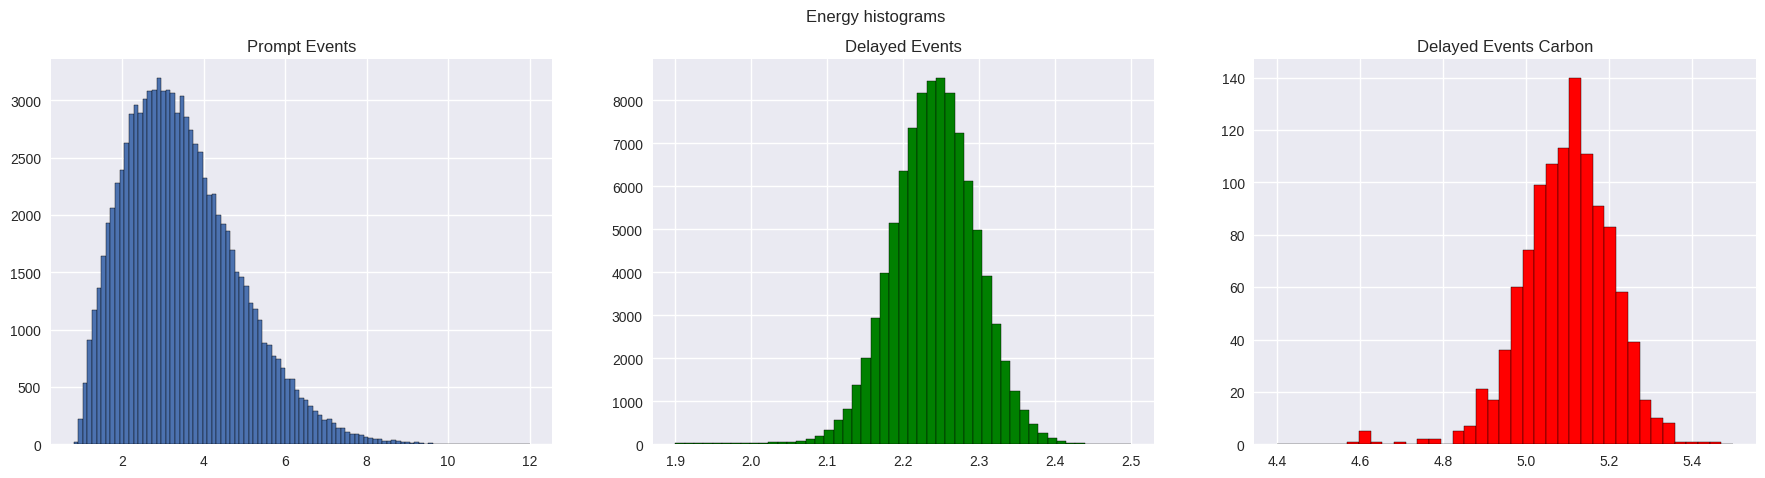

In [30]:
fig_dp, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22,5))
fig_dp.suptitle("Energy histograms")

ax1.hist(prompt_events["m_QEn"], np.linspace(0.8,12,100))
ax1.set_title("Prompt Events")
ax2.hist(delay_events["m_QEn"], np.linspace(1.9,2.5,50), color = 'green')
ax2.set_title("Delayed Events")
ax3.hist(delay_events_carb["m_QEn"], np.linspace(4.4,5.5,40), color = 'red')
ax3.set_title("Delayed Events Carbon")

In [31]:
from scipy.stats import norm
(mu, sigma) = norm.fit(delay_events["m_QEn"])
(mu_carb, sigma_carb) = norm.fit(delay_events_carb["m_QEn"])

print(mu, sigma)
print(mu_carb, sigma_carb)


2.2406948 0.056339595
5.09985 0.10790273


# **Efficency**

In [33]:
(len(prompt_events)+len(delay_events)+len(delay_events_carb))/len(dataset)

0.9640003627167485

In [34]:
print("% of delay events at ~4.9MeV",len(delay_events_carb)/(len(delay_events)+len(delay_events_carb)) * 100)


print("% of delay events at ~2.2MeV",len(delay_events)/(len(delay_events)+len(delay_events_carb)) * 100)

% of delay events at ~4.9MeV 1.1555167612278405
% of delay events at ~2.2MeV 98.84448323877216


# **Efficency cuts distibution**


Delta time variations

In [35]:
delta_time_series = [0.2e6, 0.3e6, 0.4e6, 0.5e6, 0.6e6, 0.7e6, 0.8e6, 1e6]


for t in range(len(delta_time_series)):
    prompt_columns = []
    delay_columns = []
    delay_columns_carb = []
    for i in range(len(dataset)-1):
        if dataset["m_triggerT"][i+1] - dataset["m_triggerT"][i] < delta_time_series[t]: #time cut
            if dist(dataset['recx'][i+1],dataset['recx'][i],dataset['recy'][i+1],dataset['recy'][i],dataset['recz'][i+1],dataset['recz'][i]) < delta_radius: #radius cut
                if dataset["m_QEn"][i]>= min_energy_prompt and dataset["m_QEn"][i]<= max_energy_prompt:
                    if dataset["m_QEn"][i+1]>= min_energy_delay and dataset["m_QEn"][i+1]<= max_energy_delay:
                        prompt_columns.append(i)
                        delay_columns.append(i+1)
                    if dataset["m_QEn"][i+1]>= min_energy_delay_carb and dataset["m_QEn"][i+1]<= max_energy_delay_carb:
                        delay_columns_carb.append(i+1)
    prompt_events = dataset.iloc[prompt_columns]
    delay_events = dataset.iloc[delay_columns]
    delay_events_carb = dataset.iloc[delay_columns_carb]
    print(delta_time_series[t], " -> ",(len(prompt_events)+len(delay_events)+len(delay_events_carb))/len(dataset))




200000.0  ->  0.5969108623590694
300000.0  ->  0.7416096563258808
400000.0  ->  0.8402333477748335
500000.0  ->  0.8653212562090055
600000.0  ->  0.9123384147263
700000.0  ->  0.9358898147121943
800000.0  ->  0.952393426766481
1000000.0  ->  0.9640003627167485


Delta Radius Variations

In [36]:
delta_radius_series = [800, 1000, 1100, 1200, 1300, 1400, 1500, 1600]


for t in range(len(delta_time_series)):
    prompt_columns = []
    delay_columns = []
    delay_columns_carb = []
    for i in range(len(dataset)-1):
        if dataset["m_triggerT"][i+1] - dataset["m_triggerT"][i] < delta_time: #time cut
            if dist(dataset['recx'][i+1],dataset['recx'][i],dataset['recy'][i+1],dataset['recy'][i],dataset['recz'][i+1],dataset['recz'][i]) < delta_radius_series[t]: #radius cut
                if dataset["m_QEn"][i]>= min_energy_prompt and dataset["m_QEn"][i]<= max_energy_prompt:
                    if dataset["m_QEn"][i+1]>= min_energy_delay and dataset["m_QEn"][i+1]<= max_energy_delay:
                        prompt_columns.append(i)
                        delay_columns.append(i+1)
                    if dataset["m_QEn"][i+1]>= min_energy_delay_carb and dataset["m_QEn"][i+1]<= max_energy_delay_carb:
                        delay_columns_carb.append(i+1)
    prompt_events = dataset.iloc[prompt_columns]
    delay_events = dataset.iloc[delay_columns]
    delay_events_carb = dataset.iloc[delay_columns_carb]
    print(delta_radius_series[t], " -> ",(len(prompt_events)+len(delay_events)+len(delay_events_carb))/len(dataset))


800  ->  0.8750340046951668
1000  ->  0.9212703146567793
1100  ->  0.9347664003385356
1200  ->  0.9437839417235091
1300  ->  0.950186899880102
1400  ->  0.9542976896958217
1500  ->  0.957305216068352
1600  ->  0.9594109883023849


# Questions: 
-  I did the selection assuming that the delayed event alway comes after the prompt, but assuming that there are 2 different IBD events spatially close, if the second prompt event appens befor the first delayed one, we lose an event or am I wrong?
-  The delta_time histogram 